<h1 style="text-align: center; font-size: 60px;"> Интеллектуальный анализ и обработка данных</h1>
<hr>
<h2 style="text-align: center;font-size: 40px;"> ЛАБОРАТОРНАЯ РАБОТА №1 <br>
 Разведочный и предиктивный анализ данных на основе регрессионных моделей</h2>
 <hr>

<h3 style="text-align: center; font-size: 30px;">Исполнители</h3>
<p><b>Корзун Николай Вадимович</b> <a href="https://github.com/nikoloskorzun">GitHub</a></p>


<hr>
<h3 style="text-align: center; font-size: 30px;">Постановка задачи</h3>

<p><b>Вариант №12</b></p>
<p>Набор данных различных форм зданий, различающихся по площади остекления, распределению площади остекления, ориентации и другим параметрам. <br>В зависимости от параметров здания других признаков аргументов. Построить регрессионную модель оценки целевого признака требований к тепловой нагрузке зданий:</p>

<ol>
    <li>X1 вещественный, относительная компактность</li>
    <li>X2 вещественный, площадь поверхности</li>
    <li>X3 вещественный, площадь сплошной стены</li>
    <li>X4 вещественный, зона крыши</li>
    <li>X5 вещественный, общая высота</li>
    <li>X6 целочисленный, ориентация</li>
    <li>X7 вещественный, площадь сплошного остекления</li>
    <li>X8 целочисленный, распределение площади остекления</li>    
    <li>Y1 целевой признак, вещественный, отопительная нагрузка</li>
</ol>

a. Пункт 3.h – Нормализация
b. Пункт 4 – гребневая регрессия (регуляризованная линейная регрессия

<h3 style="text-align: center; font-size: 30px;">Выполнение задачи</h3>
<h4 style="text-align: center; font-size: 24px;">Этап 2<br>Загрузка датасета</h4>

In [1]:
names = ['относительная компактность', 'площадь поверхности', 'площадь сплошной стены',
         'зона крыши', 'общая высота', 'ориентация', 'площадь сплошного остекления',
         'распределение площади остекления', 'отопительная нагрузка']


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


from IPython.core.display import HTML
from IPython.display import display

import ipywidgets as widgets


import pandas as pd

import seaborn as sns


import numpy as np


import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px




In [3]:
df = pd.read_excel("../V12.xlsx", names = names)


<h4 style="text-align: center; font-size: 24px;">Этап 3<br>Разведочный анализ данных</h4>
<h5 style="text-align: center; font-size: 20px;">Описательная статистика</h5>

In [4]:
HTML(f'<p>размерность набора данных: <b>{df.shape}</b></p>')

In [5]:
print("Типы атрибутов:", end="\n\n")
df.info()
#df.head()

Типы атрибутов:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   относительная компактность        768 non-null    float64
 1   площадь поверхности               768 non-null    float64
 2   площадь сплошной стены            768 non-null    float64
 3   зона крыши                        768 non-null    float64
 4   общая высота                      768 non-null    float64
 5   ориентация                        768 non-null    int64  
 6   площадь сплошного остекления      768 non-null    float64
 7   распределение площади остекления  768 non-null    int64  
 8   отопительная нагрузка             768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [6]:
pd.set_option('display.precision', 3)
df.describe().drop('count')

,относительная компактность,площадь поверхности,площадь сплошной стены,зона крыши,общая высота,ориентация,площадь сплошного остекления,распределение площади остекления,отопительная нагрузка
mean,0.764,671.708,318.500,176.604,5.250,3.500,0.234,2.812,22.307
std,0.106,88.086,43.626,45.166,1.751,1.119,0.133,1.551,10.090
min,0.620,514.500,245.000,110.250,3.500,2.000,0.000,0.000,6.010
25%,0.682,606.375,294.000,140.875,3.500,2.750,0.100,1.750,12.992
50%,0.750,673.750,318.500,183.750,5.250,3.500,0.250,3.000,18.950
75%,0.830,741.125,343.000,220.500,7.000,4.250,0.400,4.000,31.668
max,0.980,808.500,416.500,220.500,7.000,5.000,0.400,5.000,43.100


<h5 style="text-align: center; font-size: 20px;">Визуализация данных</h5>

In [7]:

# Функции для расчета количества бинов по разным правилам
def sturges_bins(data):
    n = len(data)
    return int(np.ceil(np.log2(n)) + 1)

def scott_bins(data):
    h = 3.5 * np.std(data) / (len(data) ** (1/3))
    return int(np.ceil((np.max(data) - np.min(data)) / h))

def fd_bins(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    h = 2 * iqr / (len(data) ** (1/3))
    return int(np.ceil((np.max(data) - np.min(data)) / h))

def sqrt_bins(data):
    return int(np.ceil(np.sqrt(len(data))))

# Словарь с доступными правилами
rules_dict = {
    '100_n': lambda _: 100,
    'sturges': sturges_bins,
    'scott': scott_bins,
    'fd': fd_bins,
    'sqrt': sqrt_bins,
    '50_n': lambda _: 50,
    '20_n': lambda _: 20,
    '10_n': lambda _: 10,

}
# Создаем выпадающие списки для каждого столбца
rule_widgets = {column: widgets.Dropdown(options=list(rules_dict.keys()), description=f'{column}:') for column in df.columns}

# Функция для обновления графиков
def update_plots(**rules):
    n_cols = 3  # Количество графиков в ряду
    n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Количество рядов
    
    # Создаем subplot с помощью Plotly
    fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=df.columns)
    
    for i, column in enumerate(df.columns):
        row = (i // n_cols) + 1
        col = (i % n_cols) + 1
        
        rule = rules[column]  # Получаем правило для текущего столбца
        
        # Выбираем количество бинов в зависимости от правила

        bins = rules_dict[rule](df[column])
        #print(bins)
        # Строим гистограмму
        fig.add_trace(
            go.Histogram(x=df[column], nbinsx=bins, name=column),
            row=row, col=col
        )
    
    # Настраиваем макет
    fig.update_layout(
        height=n_rows * 400,  # Высота графика
        width=1200,  # Ширина графика
        showlegend=False,  # Скрываем легенду
        title_text="Одномерные графики - Гистограммы"
    )
    
    # Показываем график
    fig.show()

# Интерактивное обновление графиков
widgets.interact(update_plots, **rule_widgets)

interactive(children=(Dropdown(description='относительная компактность:', options=('100_n', 'sturges', 'scott'…

<function __main__.update_plots(**rules)>

<h6 style="text-align: left; font-size: 20px;">Одномерные графики - график плотности</h6>

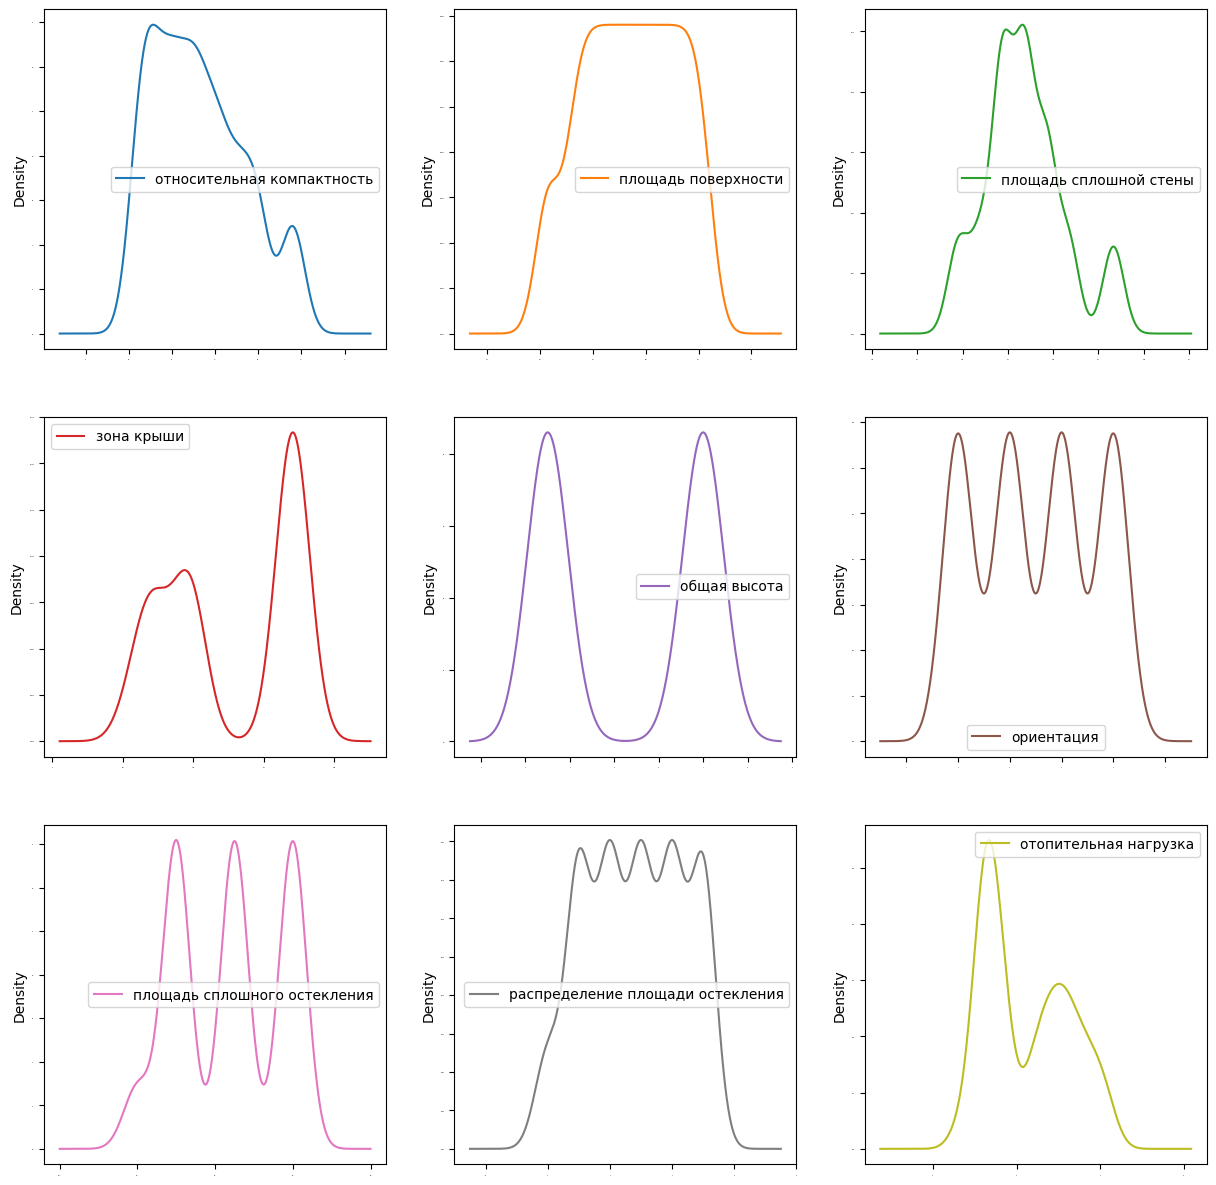

In [8]:
df.plot(kind="density", subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

<h6 style="text-align: left; font-size: 20px;">Многомерные графики: график корреляционной матрицы.</h6>


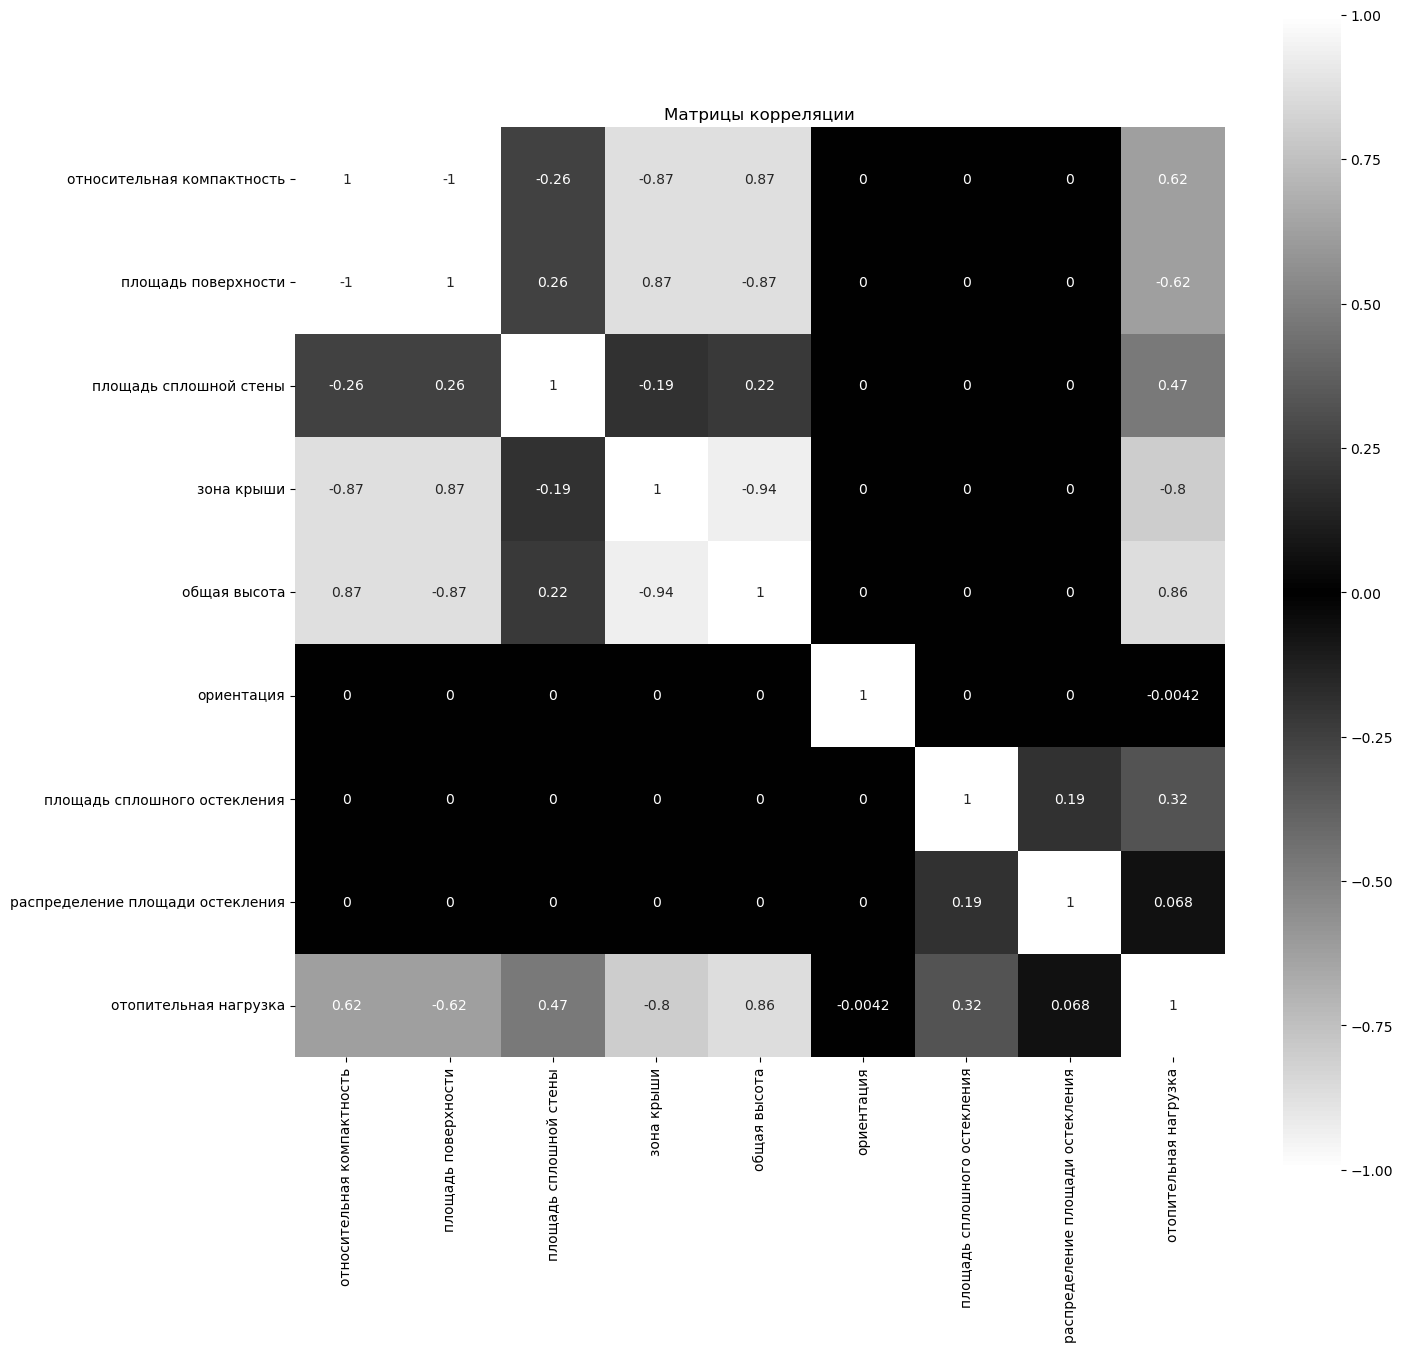

In [9]:
corr = df.corr(method='spearman')

colors = [(1, 1, 1), (0, 0, 0), (1, 1, 1)]  # Белый -> Черный -> Белый
# Создаем цветовую карту
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
plt.figure(figsize=(15, 15))
plt.title("Матрицы корреляции")
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap=cmap)
plt.show()

<h6 style="text-align: left; font-size: 20px;">Многомерные графики: матрица диаграммы рассеяния.</h6>


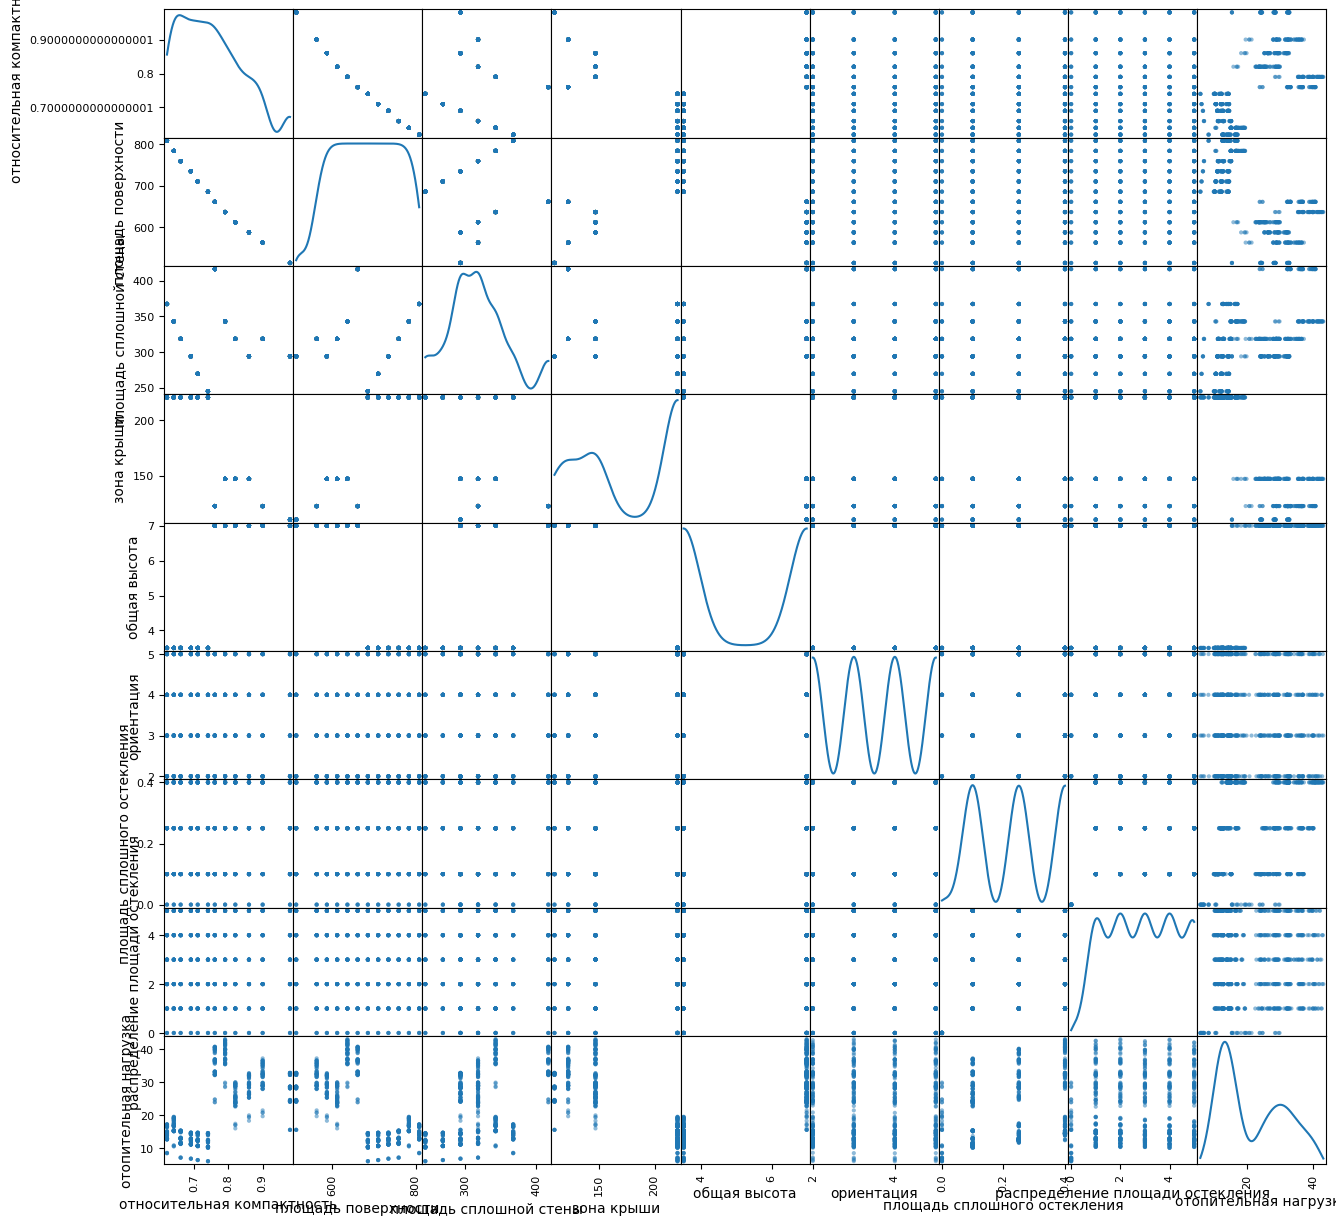

In [20]:
STATIC =  str(input())
if STATIC != "resizeable":
    pd.plotting.scatter_matrix(df, figsize=(15, 15), diagonal='kde')
    plt.show()
else:
    # Создаем scatter matrix с помощью plotly
    fig = px.scatter_matrix(df)
    fig.update_layout(width=1800, height=1800)  # Настройка размера
    fig.show()




<h6 style="text-align: left; font-size: 20px;">Многомерные графики: матрица диаграммы рассеяния.</h6>


In [52]:
new_corr = corr["отопительная нагрузка"].drop("отопительная нагрузка").sort_values(ascending=False, key=lambda x: x.abs())
print(new_corr)

общая высота                        0.861
зона крыши                         -0.804
площадь поверхности                -0.622
относительная компактность          0.622
площадь сплошной стены              0.471
площадь сплошного остекления        0.323
распределение площади остекления    0.068
ориентация                         -0.004
Name: отопительная нагрузка, dtype: float64


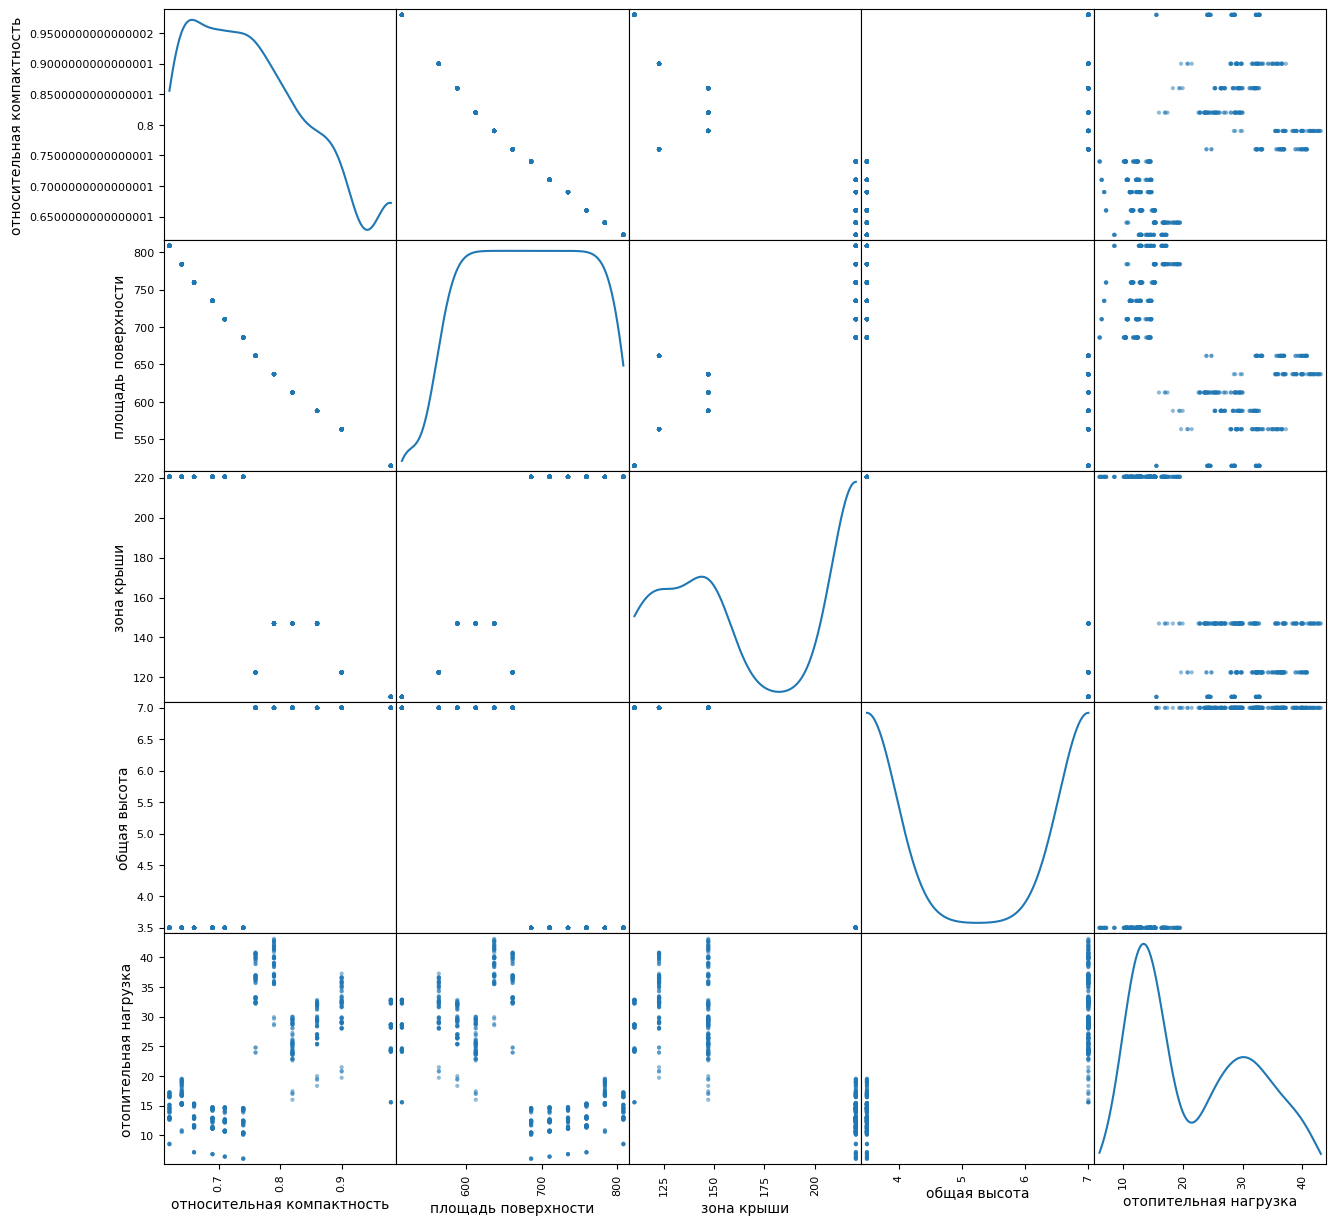

In [55]:
pd.plotting.scatter_matrix(df.drop(columns = list(new_corr.keys())[4:]), figsize=(15, 15), diagonal='kde')
plt.show()

In [57]:
print(new_corr.keys())

Index(['общая высота', 'зона крыши', 'площадь поверхности',
       'относительная компактность', 'площадь сплошной стены',
       'площадь сплошного остекления', 'распределение площади остекления',
       'ориентация'],
      dtype='object')


In [12]:
import session_info
session_info.show()

S:\anaconda\envs\study\Lib\site-packages\session_info\main.py:213: UserWarning:

The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.

